In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fftpack

In [2]:
# Function to apply frequency domain filter to an image
def apply_frequency_filter(image, filter_type, cutoff_frequency, filter_order=None):
    # Perform 2D Fourier Transform
    f_transform = fftpack.fft2(image)
    f_transform_shifted = fftpack.fftshift(f_transform)

    # Generate frequency grid
    rows, cols = image.shape
    x, y = np.meshgrid(np.fft.fftshift(np.fft.fftfreq(cols)), np.fft.fftshift(np.fft.fftfreq(rows)))
    radius = np.sqrt(x**2 + y**2)

    # Generate frequency domain filter
    if filter_type == 'ideal':
        freq_filter = np.ones_like(radius)
        freq_filter[radius > cutoff_frequency] = 0
    elif filter_type == 'butterworth':
        freq_filter = 1 / (1 + (radius / cutoff_frequency)**(2 * filter_order))
    elif filter_type == 'gaussian':
        freq_filter = np.exp(-(radius / (2 * cutoff_frequency))**2)

    # Apply the filter in the frequency domain
    filtered_transform = f_transform_shifted * freq_filter

    # Inverse Fourier Transform
    filtered_image = np.abs(fftpack.ifft2(fftpack.ifftshift(filtered_transform)))

    return filtered_image


In [3]:
# Function to display images side by side
def plot_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [4]:
# Load a grayscale image
image = cv2.imread('/content/test.jpeg', cv2.IMREAD_GRAYSCALE)

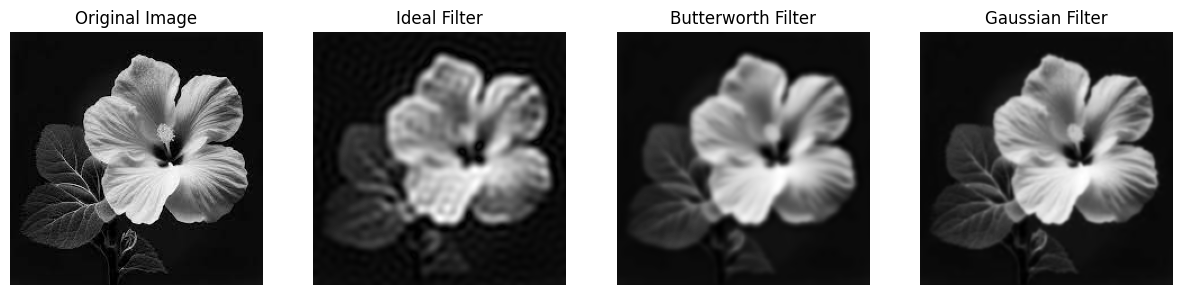

In [5]:
# a. Compare Ideal, Butterworth, and Gaussian filters with the same cutoff frequency
cutoff_frequency_a = 0.1
ideal_output = apply_frequency_filter(image, 'ideal', cutoff_frequency_a)
butterworth_output = apply_frequency_filter(image, 'butterworth', cutoff_frequency_a, filter_order=2)
gaussian_output = apply_frequency_filter(image, 'gaussian', cutoff_frequency_a)

plot_images([image, ideal_output, butterworth_output, gaussian_output],
            ['Original Image', 'Ideal Filter', 'Butterworth Filter', 'Gaussian Filter'])

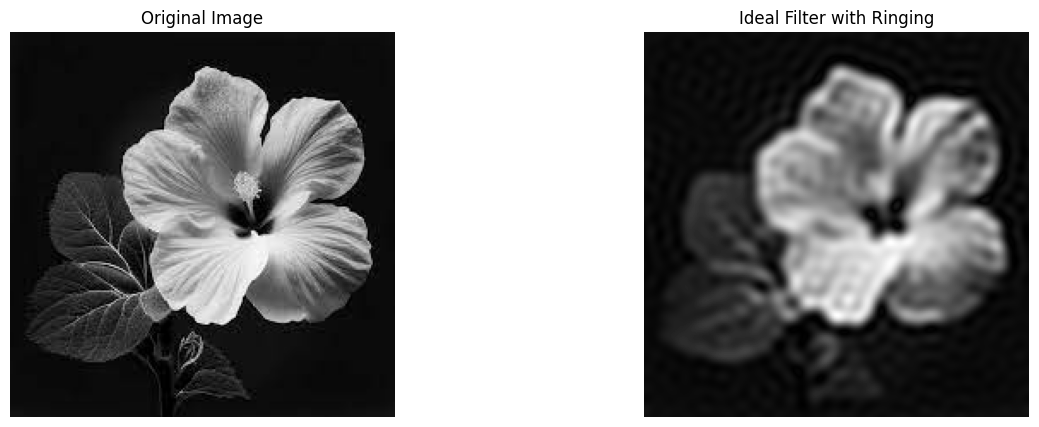

In [6]:
# b. Demonstrate ringing effect with Ideal filter
cutoff_frequency_b = 0.1
ideal_ringing_output = apply_frequency_filter(image, 'ideal', cutoff_frequency_b)

plot_images([image, ideal_ringing_output],
            ['Original Image', 'Ideal Filter with Ringing'])

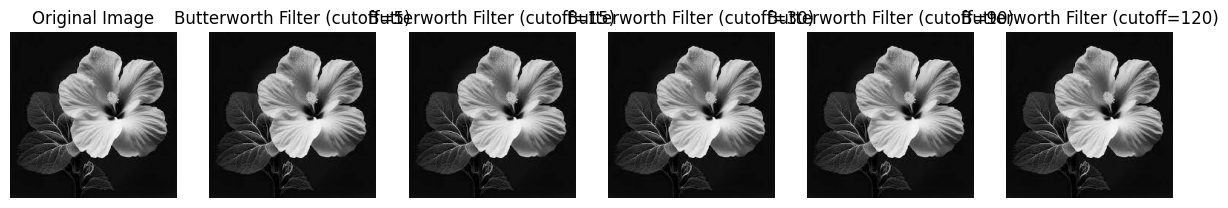

In [7]:
# c. Compare Butterworth filters for different cutoff frequencies
cutoff_frequencies_c = [5, 15, 30, 90, 120]
butterworth_outputs_c = [apply_frequency_filter(image, 'butterworth', f, filter_order=2) for f in cutoff_frequencies_c]

plot_images([image] + butterworth_outputs_c,
            ['Original Image'] + [f'Butterworth Filter (cutoff={f})' for f in cutoff_frequencies_c])

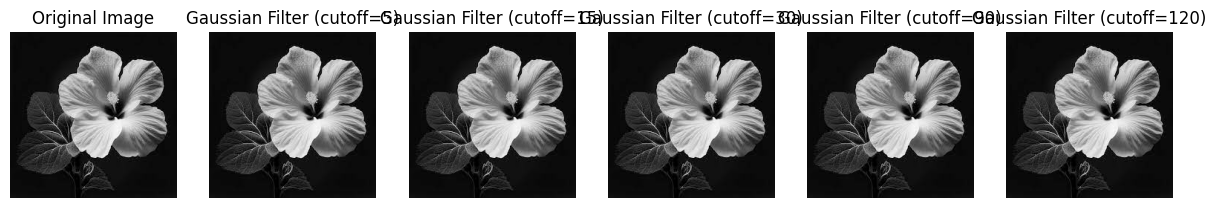

In [8]:
# d. Compare Gaussian filters for different cutoff frequencies
cutoff_frequencies_d = [5, 15, 30, 90, 120]
gaussian_outputs_d = [apply_frequency_filter(image, 'gaussian', f) for f in cutoff_frequencies_d]

plot_images([image] + gaussian_outputs_d,
            ['Original Image'] + [f'Gaussian Filter (cutoff={f})' for f in cutoff_frequencies_d])
